[-0.7535230844118203, -0.5768668140444174, -0.544761347523451, -0.6659704359372136, -0.5205548139137889, -0.4820849398232967, -0.7194835634172025, -0.46451003298849447, -0.40781312469786335, -0.4605246953303711, -0.18482767946654374, -0.479479527011071, -0.6209622907851895, -0.6635124719587675, -0.6330370627805824, -0.5713947761679162, -0.6636509910741231, -0.6534215046595594, -0.6354968136525931, -0.5353242382854253, -0.64575962958914, -0.7261494073793193, -0.5294502059489781, -0.6827108595675717, -0.6438964670739581, -0.4097164951671939, -0.5289212406646128, -0.5344145779861867, -0.5339318213774777, -0.45015575123495377, -0.36467856399505655, -0.574037165068706, -0.4829486204239646, -0.24925157667737918, -0.4176542154225495, -0.26848922327795405, -0.29421371688365033, -0.051847675604528395, -0.04541343279489735, -0.04873758233477431, -0.03806612140086384, -0.03381379381268088, -0.032482750705831766, -0.03159616595551022, -0.02991822197250014, -0.028041442258269954, -0.025983089413017

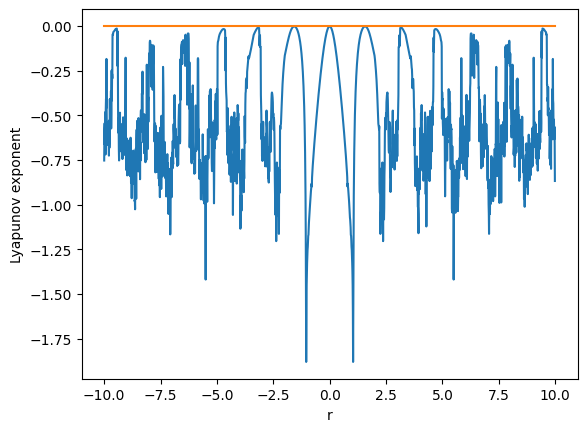

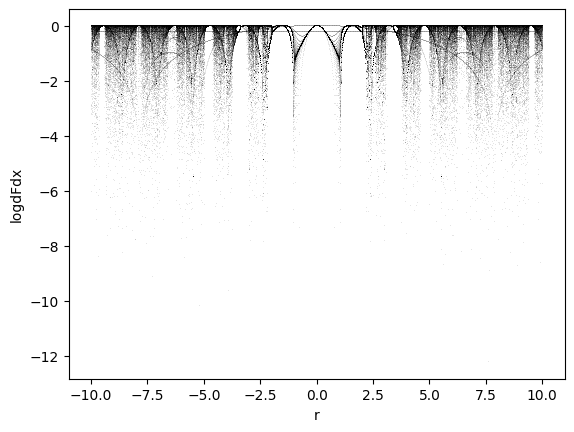

In [7]:
from pylab import *

xresult = []

def initialize():
    global x, r, result
    x = 0.1
    result = [logdFdx(x)]
    xresult = [x]

def observe():
    global x, r, result
    result.append(logdFdx(x))
    xresult.append(x)

def update():
    global x, r, result
    x = cos(r*x)**2

def logdFdx(x):
    return log(abs(1 - 2*x))

def lyapunov_exponent(r):
    global x, result
    initialize()
    for t in range(100):
        update()
        observe()
    return mean(result)

def plot_bifurcation_diagram():
    global x, r, result
    rvalues = arange(-10, 10, 0.01)
    for r in rvalues:
        initialize()
        for t in range(100):
            update()
            observe()
        plot([r]*len(result), result, ',k', alpha=0.1)
    xlabel('r')
    ylabel('logdFdx')
    show()
    

rvalues = arange(-10, 10, 0.01)
lambdas = []
for r in rvalues:
    lambdas.append(lyapunov_exponent(r))
print(lambdas)
plot(rvalues, lambdas)
plot([-10,10], [0,0])

xlabel('r')
ylabel('Lyapunov exponent')
show()

#plot the bifurcation diagram
plot_bifurcation_diagram()



We can see from the lyapunov exponent plot that as r moves away from zero, the exponent approaches zero from the negative side, indicating that the system gets more chaotic as it diverges from zero. The Bifurcation Diagram confirms this analysis, showing that the regions where logdFdx approaches negative infinity get larger and larger. The more stable regions originate from systems where the r value is either equal to pi/2 or pi, or any integer multiples of those. This is because in those systems we are basically outputting log(1) which is zero